# Cab Fare Prediction

#### Data Science project can be broken down into below workflow:

#### 1.Prepare Problem a) Load libraries b) Load dataset
#### 2.Summarize Data a) Descriptive statistics b) Data visualizations
#### 3.Prepare Data a) Data Cleaning b) Feature Selection c) Data Transforms
#### 4.Evaluate Algorithms a) Split-out validation dataset b) Test options and evaluation metric c) Spot Check Algorithms d) Compare Algorithms
#### 5.Improve Accuracy a) Algorithm Tuning b) Ensembles
#### 6.Finalize Model a) Predictions on validation dataset b) Create standalone model on entire training dataset c) Save model for later use

### Importing the relevant libraries

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

#Library for calculating distance when longitude and latitudes are given
from geopy.distance import geodesic
from geopy.distance import great_circle

#Library for Chi-Square test
from scipy.stats import chi2_contingency

#Statsmodels library
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Library for ANOVA test
from patsy import dmatrices

#Library for checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Library for splitting the data into train andd test dataset
from sklearn.model_selection import train_test_split

#Library for Standardized the data
from sklearn.preprocessing import StandardScaler

#Libraries for various types of Error Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

#library for Linear Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso

# Library for Hyperparameters Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Library for k-fold cross validation
from sklearn.model_selection import cross_val_score

#Library for Decision Tree
from sklearn.tree import DecisionTreeRegressor

#Library for Random Forest
from sklearn.ensemble import RandomForestRegressor

# Library for Ensemble method:XG Boost
from xgboost import XGBRegressor
import xgboost as xgb

### Setting the working directory

In [2]:
os.chdir('E:/Edwisor Project/Cab Fare Prediction')
os.getcwd()

'E:\\Edwisor Project\\Cab Fare Prediction'

### Loading the train and test dataset

In [3]:
train=pd.read_csv('train.csv')

In [4]:
test=pd.read_csv('test.csv')

In [5]:
train.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [6]:
test.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [7]:
#shape of train and test data
train.shape, test.shape

((16067, 7), (9914, 6))

In [8]:
# Datatype of the variables of train dataset
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [9]:
# Here Fare amount is object type which does not make sense as it is price and should be of int or float type.
train['fare_amount'] = pd.to_numeric(train['fare_amount'],errors='coerce')
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [10]:
train.isnull().sum()

fare_amount          25
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [11]:
# Datatype of the variables of test dataset
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object


#### The details of data attributes in the dataset are as follows:
#### 1. fare_amount -> object value, converted to float indicating the price charged for journey (Target variable)
#### 1. pickup_datetime -> object value indicating when the cab ride started (needs to be converted into datetime)
#### 2. pickup_longitude -> float for longitude coordinate of where the cab ride started.
#### 3. pickup_latitude -> float for latitude coordinate of where the cab ride started.
#### 4. dropoff_longitude -> float for longitude coordinate of where the cab ride ended.
#### 5. dropoff_latitude -> float for latitude coordinate of where the cab ride ended.
#### 6. passenger_count -> float value indicating the number of passengers in the cab ride.




##### Note :- As per our observation it can be seen that passengers must be limited in number in cab. So a standard value of 6 is assumed,passengers more than 6 must not be eligible to sit in cab.


### Exploratory Data Analysis : Visualization

###### 1. Visualizing distribution of fare_amount

Text(0.5, 1.0, 'Distribution of Trip Fare')

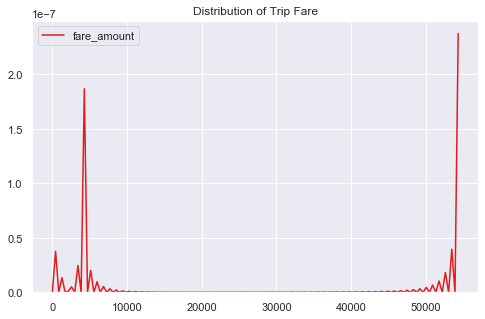

In [14]:
plt.figure(figsize=(8,5))
sns.kdeplot(train['fare_amount']).set_title("Distribution of Trip Fare")

Since we saw above that fare amount is highly skewed,let us take log transformation of the fare amount and plot the distribution

Text(0.5, 1.0, 'Distribution of fare amount (log scale)')

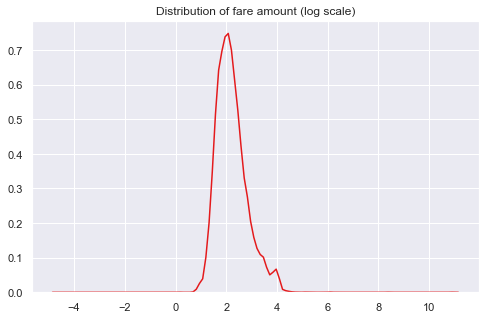

In [15]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(train['fare_amount'].values)).set_title("Distribution of fare amount (log scale)")

Most fares are between 2.7.Median fare is around 10


Text(0, 0.5, 'Frequency')

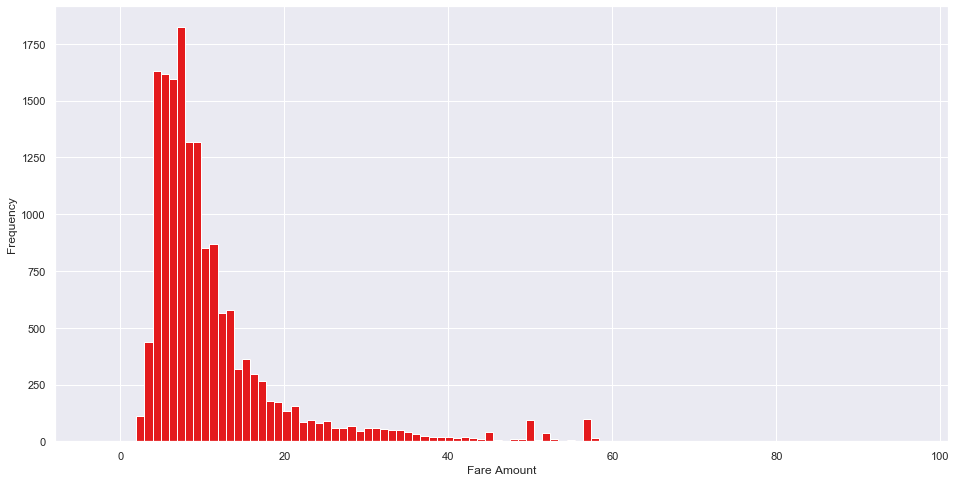

In [22]:
# Lets see the distribution of fare amount less than 100
train[train.fare_amount <100 ].fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

There are few points between 40 and 60 dollars which has slightly high frequency and that could be airport trips

In [23]:
train[train.fare_amount>100].shape

(9, 7)

Text(0, 0.5, 'Frequency')

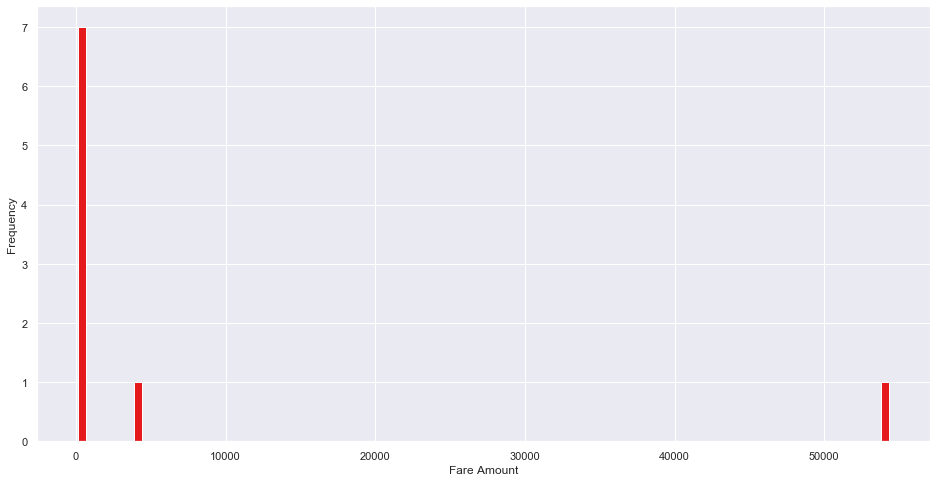

In [24]:
# Lets see the distribution of fare amount more than 100
train[train.fare_amount >100 ].fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

    => We can see here that there are total 9 trips which are above 100 dollars
    => Some of them might be outliers or few of them might be long distance trip from/to airport, we will see it in later section

 ###### 2. Visualization of passenger_count distribution

Text(0, 0.5, 'Frequency')

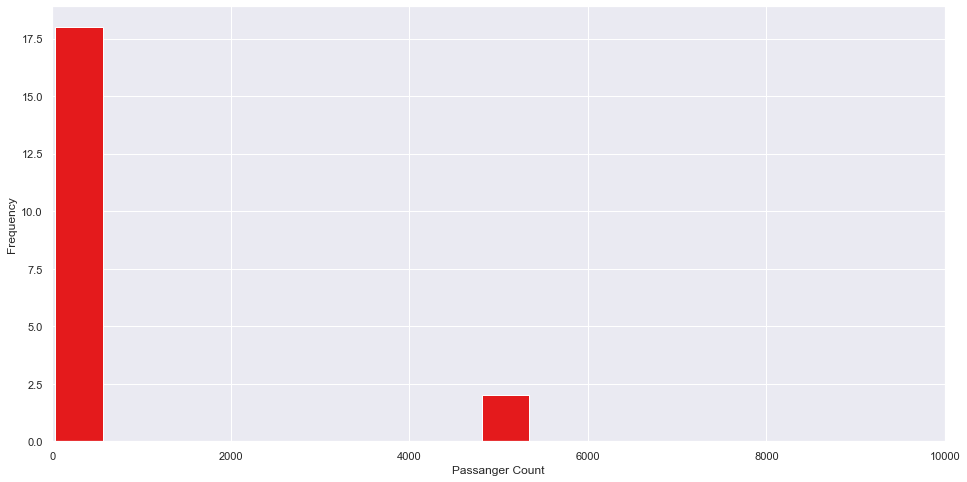

In [25]:
# checking for passanger count greater than 7
train[train.passenger_count >7].passenger_count.hist(bins=10, figsize = (16,8))
plt.xlim(0,10000)
plt.xlabel("Passanger Count")
plt.ylabel("Frequency")

In [27]:
# data for passanger count greater than 7
train[train.passenger_count >7].shape

(20, 7)

There are 20 values of passenger count >7 we will we will anayze this value in Outlier Analysis Section.

Text(0, 0.5, 'Frequency')

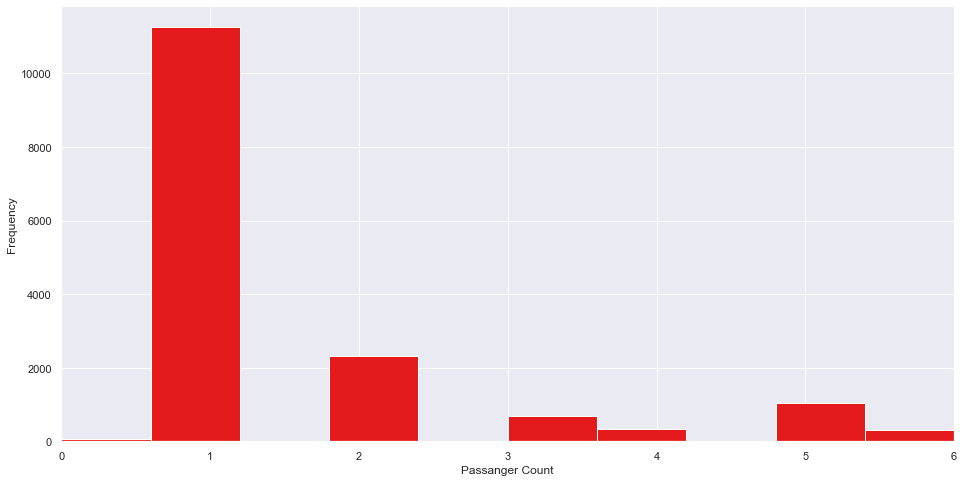

In [28]:
# checking for passanger count less than 7
train[train.passenger_count <7].passenger_count.hist(bins=10, figsize = (16,8))
plt.xlim(0,6)
plt.xlabel("Passanger Count")
plt.ylabel("Frequency")

Most of the trips are taken by single passanger, we will try to see if there is any relation between passenger count and fare amout

In [29]:
# checking for records where passanger count is 0
train[train.passenger_count ==0].shape

(57, 7)

We have 57 such cases where passanger count is zero, there can be two possibility

    Passanger count is incorrectly populated
    Taxi was not carrying any passanger, may be taxi was used for goods

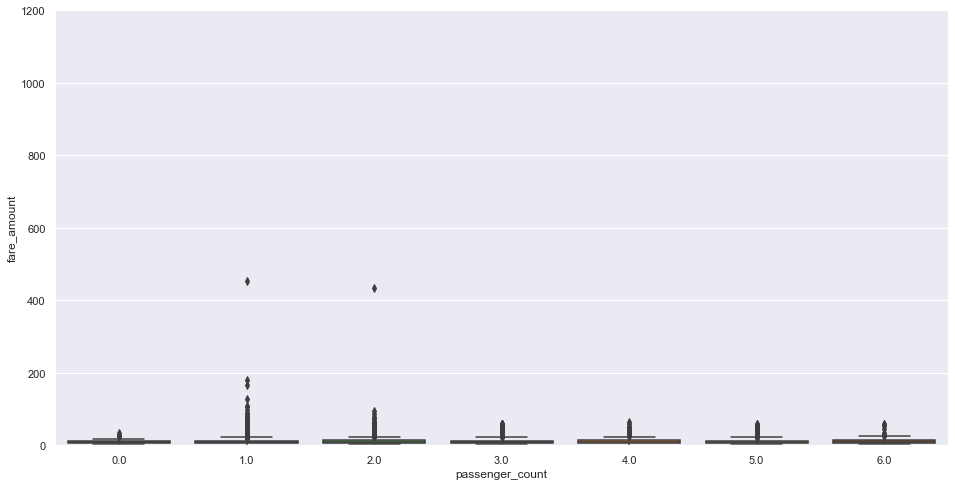

In [30]:
train['passenger_count'].dtype
train['passenger_count']=train['passenger_count'].round().astype('object')
plt.figure(figsize= (16,8))
sns.boxplot(x = train[train.passenger_count< 7].passenger_count, y = train.fare_amount)
plt.ylim(0,1200)
plt.show()

    As we can see from the box plot median price of each passanger counts looks similar except one record, There are few outliers we wil treat in cleaning section
    We will try to see if there is any relationship between passanger count and fare amount using correlation factor

##### Bi-Variate Analysis

###### 1. Joint Plot Between fare_amount and pickup_lonfitude

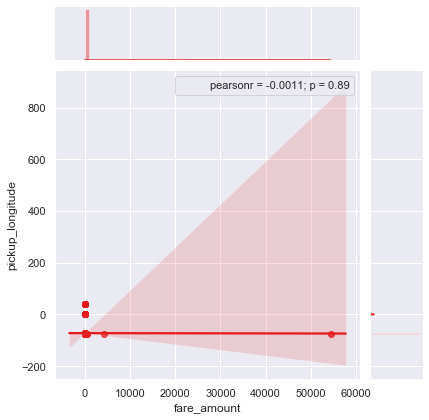

In [16]:
fare_plong= sns.jointplot(x='fare_amount',y='pickup_longitude',data=train,kind = 'reg')
fare_plong.annotate(stats.pearsonr)
plt.show()

##### 2. Joint plot between fare_amount and pickup_latitude

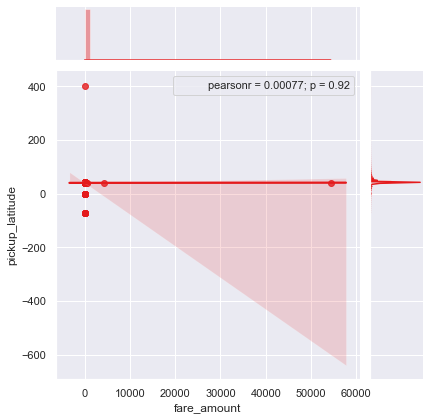

In [17]:
fare_plat= sns.jointplot(x='fare_amount',y='pickup_latitude',data=train,kind = 'reg')
fare_plat.annotate(stats.pearsonr)
plt.show()

##### 3. Joint plot between fare_amount and dropoff_longitude

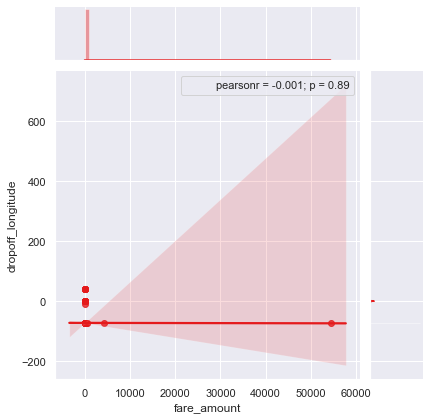

In [18]:
fare_dlong= sns.jointplot(x='fare_amount',y='dropoff_longitude',data=train,kind = 'reg')
fare_dlong.annotate(stats.pearsonr)
plt.show()

##### 4. Joint plot between fare_amount and dropoff_latitude

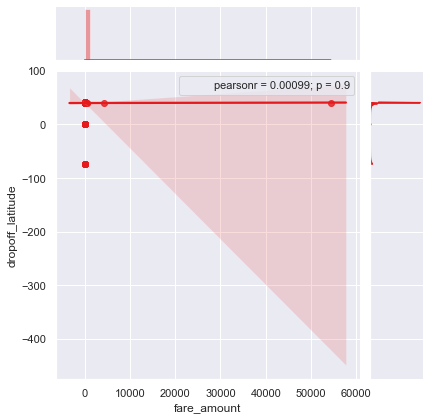

In [19]:
fare_dlati = sns.jointplot(x='fare_amount',y='dropoff_latitude',data=train,kind = 'reg')
fare_dlati.annotate(stats.pearsonr)
plt.show()

##### 5. PairPlot to visualize the spread of data

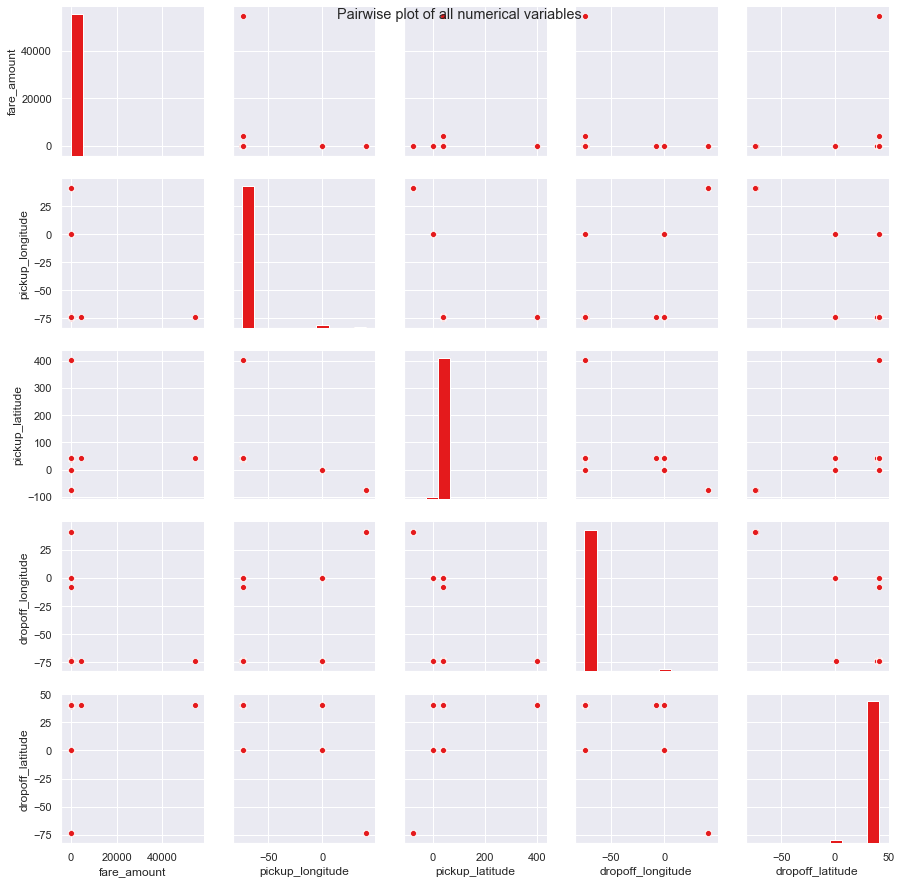

In [21]:
num_var=['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']
_ =sns.pairplot(data=train[num_var],kind='scatter',dropna=True)
_.fig.suptitle('Pairwise plot of all numerical variables')
plt.show()

### Exploratory Data Analysis

#### Exploring the descriptive statistics of the variables

In [32]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906
std,430.460945,10.578384,6.826587,10.575062,6.187087
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013
max,54343.000000,40.766125,401.083332,40.802437,41.366138


In [33]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


### Data Visualization

### Dealing values which are not within desired range(outlier) depending upon basic understanding of dataset

1. From descriptive statistics of dataset it can be observed that fare amount has a negative values, which doesn't make sense. A price amount cannot be -ve and also cannot be 0. So we will impute these fields with Exploratory data analysis.


In [34]:
sum(train['fare_amount']<1)

5

In [35]:
train[train['fare_amount']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,-2.90,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1
2486,-2.50,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1
2780,0.01,2015-05-01 15:38:41 UTC,-73.939041,40.713963,-73.941673,40.713997,1
10002,0.00,2010-02-15 14:26:01 UTC,-73.987115,40.738808,-74.005911,40.713960,1
13032,-3.00,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4


In [36]:
train.loc[train['fare_amount'] < 1,'fare_amount'] = np.nan

In [37]:
train['fare_amount'].isnull().sum()

30

Now we have 30 missing values in fare_amount

2. Passenger_Count Variable

In [38]:
len(train[train['passenger_count']>6])

20

 So 20 observations of passengers_count are there which have consistently more than 6 passengers. Let's check them

In [39]:
train[train['passenger_count']>6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
233,8.5,2011-07-24 01:14:35 UTC,0.000000,0.000000,0.000000,0.000000,236
263,4.9,2010-07-12 09:44:33 UTC,-73.983249,40.734655,-73.991278,40.738918,456
293,6.1,2011-01-18 23:48:00 UTC,-74.006642,40.738927,-74.010828,40.717907,5334
356,8.5,2013-06-18 10:27:05 UTC,-73.992108,40.764203,-73.973000,40.762695,535
386,8.1,2009-08-21 19:35:05 UTC,-73.960853,40.761557,-73.976335,40.748361,354
413,NaN,2013-09-12 11:32:00 UTC,-73.982060,40.772705,-73.956213,40.771777,55
971,10.1,2010-11-21 01:41:00 UTC,-74.004500,40.742143,-73.994330,40.720412,554
1007,3.7,2010-12-14 14:46:00 UTC,-73.969157,40.759000,-73.968763,40.764617,53
1043,5.7,2012-08-22 22:08:29 UTC,-73.973573,40.760184,-73.953564,40.767392,35
1107,4.9,2009-08-08 21:50:50 UTC,-73.988977,40.721068,-73.982368,40.732064,345


In [40]:
# Let's check how manny of passenger_count less than 1
len(train[train['passenger_count']<1])

58

In [41]:
# Let's assign nan values to those observations of passenger_count which has less than 1 passenger and more than 6 passengers as it makes no sense.
train.loc[train['passenger_count'] >6,'passenger_count'] = np.nan
train.loc[train['passenger_count'] <1,'passenger_count'] = np.nan

In [42]:
train['passenger_count'].isnull().sum()

133

3.Latitudes range from -90 to 90.Longitudes range from -180 to 180. Removing which does not satisfy these ranges

In [23]:
sum(train['pickup_longitude']>180)

0

In [24]:
sum(train['pickup_longitude']<-180)

0

In [25]:
sum(train['dropoff_longitude']>180)


0

In [26]:
sum(train['dropoff_longitude']<-180)

0

In [27]:
sum(train['pickup_latitude']>90)


1

In [28]:
sum(train['pickup_latitude']<-90)

0

In [29]:
sum(train['dropoff_latitude']>90)


0

In [30]:
sum(train['dropoff_latitude']<-90)

0

In [43]:
# Lets check which observation has pickup_latitude > 90.
train[train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1


In [44]:
# Lets check the observation having latitude and longitude values = 0.
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'equal to 0={}'.format(sum(train[i]==0)))

pickup_longitude equal to 0=315
pickup_latitude equal to 0=315
dropoff_longitude equal to 0=314
dropoff_latitude equal to 0=312


In [45]:
train.loc[train['pickup_latitude']>90 , 'pickup_latitude'] = np.nan
train.loc[train['pickup_longitude']==0 , 'pickup_longitude'] = np.nan
train.loc[train['pickup_latitude']==0 , 'pickup_latitude'] = np.nan
train.loc[train['dropoff_longitude']==0 , 'dropoff_longitude'] = np.nan
train.loc[train['dropoff_latitude']==0 , 'dropoff_latitude'] = np.nan

In [46]:
train.isnull().sum()

fare_amount           30
pickup_datetime        0
pickup_longitude     315
pickup_latitude      316
dropoff_longitude    314
dropoff_latitude     312
passenger_count      133
dtype: int64

So after Exploratory Data Analysis we have observed that the missing values has been increased. Now we have to impute them with any of the statistical method

### Missing Value Analysis

In [47]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(train.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
missing_val

,index,0
0,fare_amount,30
1,pickup_datetime,0
2,pickup_longitude,315
3,pickup_latitude,316
4,dropoff_longitude,314
5,dropoff_latitude,312
6,passenger_count,133


In [48]:
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_val
#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(train))*100
#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_percentage
0,pickup_latitude,1.966764
1,pickup_longitude,1.960540
2,dropoff_longitude,1.954316
3,dropoff_latitude,1.941868
4,passenger_count,0.827784
5,fare_amount,0.186718
6,pickup_datetime,0.000000


1.For Fare_amount:

In [49]:
train

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1


Performing a small test for determining which statistical method is best.
Choosing a random value of fare_amount to replace it as NA

In [313]:
train['fare_amount'].loc[1000]

7.0

In [314]:
# Replacing 7 as NA
train['fare_amount'].loc[1000]=np.nan
train['fare_amount'].loc[1000]

nan

In [315]:
# Impute with mean
print('Value if imputed with mean:{}'.format(train['fare_amount'].fillna(train['fare_amount'].mean()).loc[1000]))
# Impute with median
print('Value if imputed with median:{}'.format(train['fare_amount'].fillna(train['fare_amount'].median()).loc[1000]))

Value if imputed with mean:15.020709029683054
Value if imputed with median:8.5


Will consider median method for missing value imputation of fare_amount as it gives more approximte value

In [50]:
train['fare_amount']=train['fare_amount'].fillna(train['fare_amount'].median())

In [51]:
train['fare_amount'].isnull().sum()

0

2. For pickup_longitude

In [318]:
train['pickup_longitude'].loc[1000]

-73.99542

In [319]:
# Replace the value with NA
train['pickup_longitude'].loc[1000]=np.nan
train['pickup_longitude'].loc[1000]

nan

In [320]:
# Impute with mean
print('Value when imputed with mean:{}'.format(train['pickup_longitude'].fillna(train['pickup_longitude'].mean()).loc[1000]))
# Impute with median
print('Value when imputed with median:{}'.format(train['pickup_longitude'].fillna(train['pickup_longitude'].median()).loc[1000]))

Value when imputed with mean:-73.91185359519373
Value when imputed with median:-73.98204


Will consider median method for missing value imputation of pickup_longitude as it gives more approximte value

In [52]:
train['pickup_longitude']=train['pickup_longitude'].fillna(train['pickup_longitude'].median())

In [53]:
train['pickup_longitude'].isnull().sum()

0

3. For Pickup_latitude

In [323]:
train['pickup_latitude'].loc[1000]

40.759662

In [324]:
# Replace the Value with NA
train['pickup_latitude'].loc[1000]=np.nan
train['pickup_latitude'].loc[1000]

nan

In [325]:
# Impute with Mean
print('Value when imputed with Mean:{}'.format(train['pickup_latitude'].fillna(train['pickup_latitude'].mean()).loc[1000]))
# Impute with Median
print('Value when imputed by Median:{}'.format(train['pickup_latitude'].fillna(train['pickup_latitude'].median()).loc[1000]))

Value when imputed with Mean:40.69003502079446
Value when imputed by Median:40.753296500000005


Will consider median method for missing value imputation of pickup_latitude as it gives more approximte value

In [54]:
train['pickup_latitude']=train['pickup_latitude'].fillna(train['pickup_latitude'].median())

In [55]:
train['pickup_latitude'].isnull().sum()

0

4. For dropoff_longitude

In [328]:
train['dropoff_longitude'].loc[1000]

-73.987607

In [329]:
# Replace the value with NA
train['dropoff_longitude'].loc[1000]=np.nan
train['dropoff_longitude'].loc[1000]

nan

In [330]:
#Impute with Mean
print('Value when imputed with Mean:{}'.format(train['dropoff_longitude'].fillna(train['dropoff_longitude'].mean()).loc[1000]))
#Impute with Median
print('Value when imputed with Median:{}'.format(train['dropoff_longitude'].fillna(train['dropoff_longitude'].median()).loc[1000]))

Value when imputed with Mean:-73.9066931902327
Value when imputed with Median:-73.98056650000001


Will consider median method for missing value imputation of dropoff_longitude as it gives more approximte value

In [56]:
train['dropoff_longitude']=train['dropoff_longitude'].fillna(train['dropoff_longitude'].median())

In [57]:
train['dropoff_longitude'].isnull().sum()

0

5. For dropoff_latitude

In [333]:
train['dropoff_latitude'].loc[1000]

40.751247

In [334]:
# Replace the value with NA
train['dropoff_latitude'].loc[1000]=np.nan
train['dropoff_latitude'].loc[1000]

nan

In [335]:
# Impute with Mean
print('Value when imputed by Mean:{}'.format(train['dropoff_latitude'].fillna(train['dropoff_latitude'].mean()).loc[1000]))
# Impute with Median
print('Value when imputed by Median:{}'.format(train['dropoff_latitude'].fillna(train['dropoff_latitude'].median()).loc[1000]))

Value when imputed by Mean:40.688009680020464
Value when imputed by Median:40.7542265


Will consider median method for missing value imputation of dropoff_longitude as it gives more approximte value

In [58]:
train['dropoff_latitude']=train['dropoff_latitude'].fillna(train['dropoff_latitude'].median())

In [59]:
train['dropoff_latitude'].isnull().sum()

0

Let's check is there any missing value remaining in any of the field

In [60]:
train.isnull().sum()

fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
passenger_count      133
dtype: int64

Let's do missing value analysis for passenger_count as well

6. For passenger_count

In [339]:
train['passenger_count'].loc[10000]

5.0

In [340]:
# Replace with NA
train['passenger_count'].loc[10000]=np.nan
train['passenger_count'].loc[10000]

nan

In [341]:
# Impute with Mean
print('Value when imputed by Mean:{}'.format(train['passenger_count'].fillna(train['passenger_count'].mean()).loc[10000]))
# Impute with Median
print('Value when imputed by Median:{}'.format(train['passenger_count'].fillna(train['passenger_count'].median()).loc[10000]))
# Impute with Mode
print('Value when imputed by mode:{}'.format(train['passenger_count'].fillna(train['passenger_count'].mode()[0]).loc[10000]))

Value when imputed by Mean:1.6494257202033515
Value when imputed by Median:1.0
Value when imputed by mode:1.0


In [61]:
train['passenger_count']=train['passenger_count'].fillna(train['passenger_count'].median())

In [62]:
train['passenger_count'].isnull().sum()

0

In [63]:
train['passenger_count']=train['passenger_count'].astype('int')

In [52]:
train['passenger_count'].unique()

array([1, 2, 3, 6, 5, 4], dtype=int64)

In [53]:
train['passenger_count']=train['passenger_count'].round().astype('object')

In [54]:
train['passenger_count'].unique()

array([1, 2, 3, 6, 5, 4], dtype=object)

In [55]:
train['passenger_count'].describe()

count     16067
unique        6
top           1
freq      11393
Name: passenger_count, dtype: int64

In [56]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,16067.000000,16067.000000,16067.000000,16067.000000,16067.000000
mean,15.008034,-73.913235,40.691284,-73.908142,40.689299
std,430.125889,2.625261,2.580094,2.676390,2.598947
min,1.140000,-74.438233,-74.006893,-74.429332,-74.006377
25%,6.000000,-73.992156,40.737017,-73.991182,40.736815
50%,8.500000,-73.982040,40.753298,-73.980567,40.754223
75%,12.500000,-73.968439,40.767374,-73.965868,40.768013
max,54343.000000,40.766125,41.366138,40.802437,41.366138


### Outlier Analysis

We will do Box Plot Analysis for fare Amount as of now and will do for latitudes and longitudes after feature engineering

###### Univariate Boxplots: Boxplots for all Numerical Variables

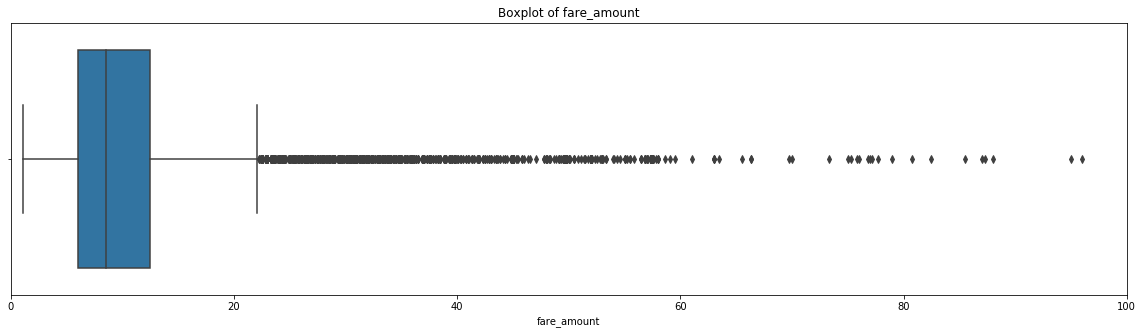

In [350]:
plt.figure(figsize=(20,5))
plt.xlim(0,100)
sns.boxplot(x=train['fare_amount'],data=train)
plt.title('Boxplot of fare_amount')
plt.show()


In [351]:
sum(train['fare_amount']>22.5)/len(train['fare_amount'])*100

8.396091367399016

Nearly 8% outliers are present in fare_amount

=> Bivariate Analysis : Boxplot for Numerical Vs Categorical Variable

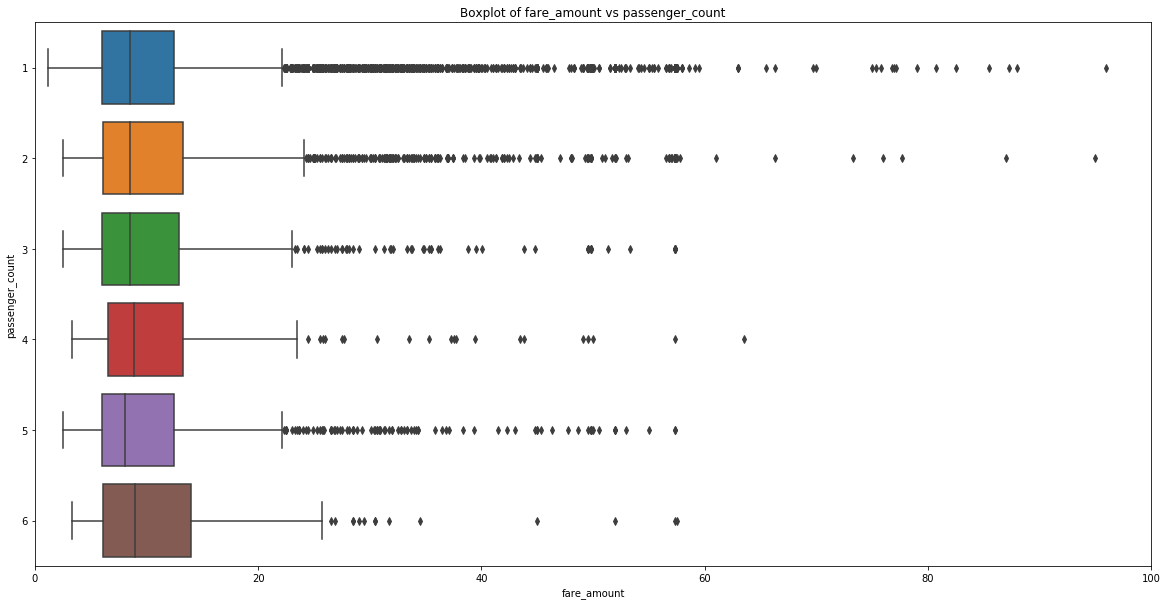

In [352]:
plt.figure(figsize=(20,10))
plt.xlim(0,100)
sns.boxplot(x=train['fare_amount'],y=train['passenger_count'],data=train,orient='h')
plt.title('Boxplot of fare_amount vs passenger_count')
plt.show()

In [68]:
def outlier_treatment(col):
    ''' calculating outlier indices and replacing them with NA  '''
    #Extract quartiles
    q75, q25 = np.percentile(train[col], [75 ,25])
    print(q75,q25)
    #Calculate IQR
    iqr = q75 - q25
    #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print(minimum,maximum)
    #Replace with NA
    train.loc[train[col] < minimum,col] = np.nan
    train.loc[train[col] > maximum,col] = np.nan

In [58]:
print('Outlier Analysis for fare_amount')
outlier_treatment('fare_amount')

Outlier Analysis for fare_amount
12.5 6.0
-3.75 22.25


In [59]:
train.isnull().sum()

fare_amount          1397
pickup_datetime         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
passenger_count         0
dtype: int64

In [60]:
# Let's impute all these values by using median imputation
train['fare_amount']=train['fare_amount'].fillna(train['fare_amount'].median())

In [61]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [62]:
train.std()

fare_amount          3.955640
pickup_longitude     2.625261
pickup_latitude      2.580094
dropoff_longitude    2.676390
dropoff_latitude     2.598947
passenger_count      1.262026
dtype: float64

In [63]:
train['passenger_count'].describe()

count     16067
unique        6
top           1
freq      11393
Name: passenger_count, dtype: int64

In [41]:
train['passenger_count'].unique()

array([1.000e+00, 2.000e+00, 3.000e+00,       nan, 6.000e+00, 5.000e+00,
       4.000e+00, 2.360e+02, 4.560e+02, 5.334e+03, 0.000e+00, 5.350e+02,
       3.540e+02, 5.500e+01, 5.540e+02, 5.300e+01, 3.500e+01, 3.450e+02,
       5.345e+03, 5.360e+02, 4.300e+01, 5.800e+01, 5.370e+02, 8.700e+01,
       5.312e+02, 1.300e+00, 1.200e-01, 5.570e+02])

In [64]:
train['passenger_count']=train['passenger_count'].astype('int').round().astype('object').astype('category')

In [66]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,16067.000000,16067.000000,16067.000000,16067.000000,16067.000000
mean,8.822496,-73.913235,40.691284,-73.908142,40.689299
std,3.955640,2.625261,2.580094,2.676390,2.598947
min,1.140000,-74.438233,-74.006893,-74.429332,-74.006377
25%,6.000000,-73.992156,40.737017,-73.991182,40.736815
50%,8.000000,-73.982040,40.753298,-73.980567,40.754223
75%,10.500000,-73.968439,40.767374,-73.965868,40.768013
max,22.100000,40.766125,41.366138,40.802437,41.366138


In [67]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [68]:
train.shape

(16067, 7)

### Feature Engineering

#### 1. Feature Engineering for pickup_datetime (timestamp) Variable

We will derive new features from pickup_datetime.

New features will be day of week,month,year,hour

In [69]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [70]:
#let's convert pickup_datetime variable into datetime value
data=[train,test]
for i in data:
    i['pickup_datetime']  = pd.to_datetime(i['pickup_datetime'],errors='coerce')

In [71]:
train['pickup_datetime'].dtype

datetime64[ns, UTC]

In [72]:
test['pickup_datetime'].dtype

datetime64[ns, UTC]

In [73]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [74]:
train.isnull().sum()

fare_amount          0
pickup_datetime      1
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

After conversion the type of pickup_datetime. One missing value has been observed in pickup_datetime column. Only one missing value is observed so we can easily drop it

In [75]:
train[train['pickup_datetime'].isnull()]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1327,11.5,NaT,-73.981947,40.7282,-73.988582,40.759202,1


In [76]:
#Dropping missing value if any of whole train dataset.(specifically 1 missing value present in pickup_datetime column)
train=train.dropna()

In [77]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

Now our data is free from outliers and missing value. Its time to apply some feature engineering on piskup_datetime column

In [78]:
# function to fetch year,month,day_of_week and hour

data=[train,test]
for i in data:
    i['year']=i['pickup_datetime'].apply(lambda row:row.year)
    i['month']=i['pickup_datetime'].apply(lambda row:row.month)
    i['day_of_week']=i['pickup_datetime'].apply(lambda row:row.dayofweek)
    i['hour']=i['pickup_datetime'].apply(lambda row:row.hour)
    

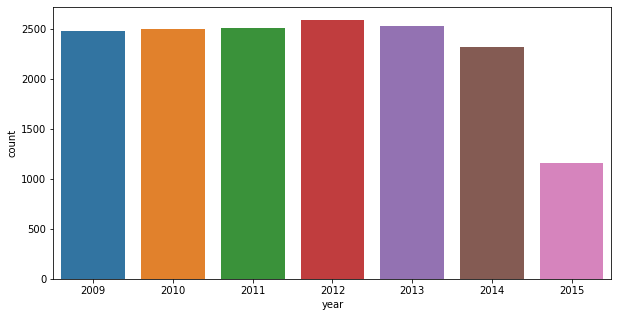

In [79]:
plt.figure(figsize=(10,5))
sns.countplot(train['year'])

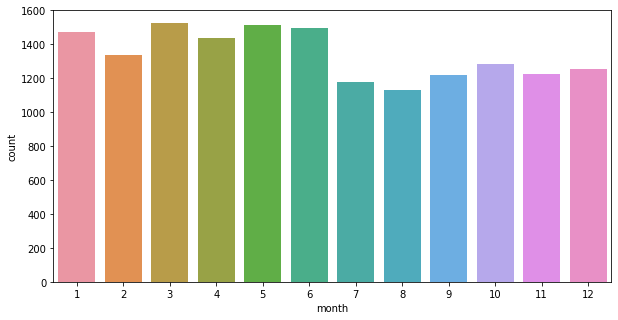

In [80]:
plt.figure(figsize=(10,5))
sns.countplot(train['month'])

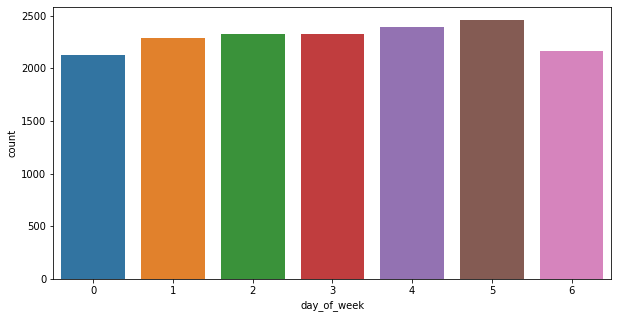

In [81]:
plt.figure(figsize=(10,5))
sns.countplot(train['day_of_week'])

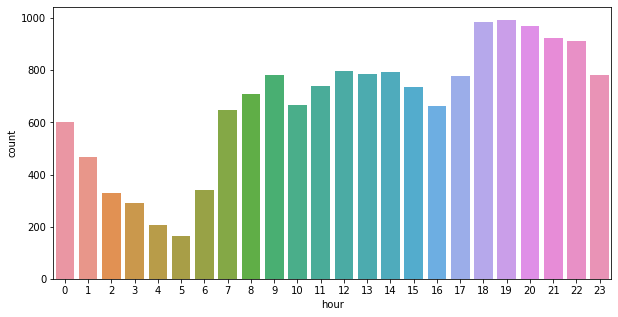

In [82]:
plt.figure(figsize=(10,5))
sns.countplot(train['hour'])

After Data Visualization we can extract more features from month,year,hour and day_of_week columns.

From Month column we can extract various seasons such as spring,summer,rainy and winter

From Hour column we can extract various time intervals such as Morning,Afternoon,evening,Late_night,Early_morning

From day_of_week column we can extract Weekday and Weekend.

In [83]:
def timeinterval(x):
    if(x>=5) and (x<=11):
        return 'Morning'
    elif (x>=12) and (x<=16):
        return 'Afternoon'
    elif (x>=17) and (x<=20):
        return 'Evening'
    elif (x>=21) and (x<=23):
        return 'LateNight'
    elif (x>=0) and (x<=4):
        return 'EarlyMorning'

In [84]:
train['TimeInterval'] = train['hour'].apply(timeinterval)
test['TimeInterval'] = test['hour'].apply(timeinterval)

In [85]:
def seasons(x):
    if (x>=3) and (x<=5):
        return 'Spring'
    elif (x>=6) and (x<=8):
        return 'Summer'
    elif (x>=9) and (x<=11):
        return 'Rainy'
    elif (x>=12)|(x<=2):
        return 'Winter'

In [86]:
train['Seasons']=train['month'].apply(seasons)
test['Seasons']=test['month'].apply(seasons)

In [87]:
def WeekendWeekday(x):
    if (x>=0) and (x<=4):
        return 'Weekday'
    elif(x>=5) and (x<=6):
        return 'Weekend'

In [88]:
train['WeekendWeekday']=train['day_of_week'].apply(WeekendWeekday)
test['WeekendWeekday']=test['day_of_week'].apply(WeekendWeekday)

In [89]:
train

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_week,hour,TimeInterval,Seasons,WeekendWeekday
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,0,17,Evening,Summer,Weekday
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,16,Afternoon,Winter,Weekday
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,3,0,EarlyMorning,Summer,Weekday
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,5,4,EarlyMorning,Spring,Weekend
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,1,7,Morning,Spring,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00+00:00,-74.008820,40.718757,-73.998865,40.719987,1,2014,12,4,7,Morning,Winter,Weekday
16063,16.1,2009-07-13 07:58:00+00:00,-73.981310,40.781695,-74.014392,40.715527,2,2009,7,0,7,Morning,Summer,Weekday
16064,8.5,2009-11-11 11:19:07+00:00,-73.972507,40.753417,-73.979577,40.765495,1,2009,11,2,11,Morning,Rainy,Weekday
16065,8.1,2010-05-11 23:53:00+00:00,-73.957027,40.765945,-73.981983,40.779560,1,2010,5,1,23,LateNight,Spring,Weekday


In [90]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day_of_week          0
hour                 0
TimeInterval         0
Seasons              0
WeekendWeekday       0
dtype: int64

In [91]:
test

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_week,hour,TimeInterval,Seasons,WeekendWeekday
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,1,13,Afternoon,Winter,Weekday
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,1,13,Afternoon,Winter,Weekday
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,5,11,Morning,Rainy,Weekend
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,5,21,LateNight,Winter,Weekend
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,5,21,LateNight,Winter,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,6,12,Afternoon,Spring,Weekend
9910,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,0,17,Evening,Winter,Weekday
9911,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,6,20,Evening,Spring,Weekend
9912,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,5,1,EarlyMorning,Winter,Weekend


#### 2. Feature Engineering for Passenger_count Variable

As passenger_count variable is categorical, during model development it may be problematic to provide categorical variable as input.

In order to overcome this flaw we will do One-Hot Encoding.
(One Hot Encoder is used to convert categorical variable into numerical)

In [92]:
train['passenger_count'].describe()

count     16066
unique        6
top           1
freq      11392
Name: passenger_count, dtype: int64

In [93]:
# Creating dummines for categorical variables. Extracting the features from those dummies and converting them into new columns.
temp=pd.get_dummies(train['passenger_count'],prefix='passenger_count')
train=train.join(temp)
temp=pd.get_dummies(test['passenger_count'],prefix='passenger_count')
test=test.join(temp)

temp=pd.get_dummies(train['TimeInterval'],prefix='TimeInterval')
train=train.join(temp)
temp=pd.get_dummies(test['TimeInterval'],prefix='TimeInterval')
test=test.join(temp)

temp=pd.get_dummies(train['Seasons'],prefix='Seasons')
train=train.join(temp)
temp=pd.get_dummies(test['Seasons'],prefix='Seasons')
test=test.join(temp)

temp=pd.get_dummies(train['WeekendWeekday'],prefix='WeekendWeekday')
train=train.join(temp)
temp=pd.get_dummies(test['WeekendWeekday'],prefix='WeekendWeekday')
test=test.join(temp)

temp=pd.get_dummies(train['year'],prefix='year')
train=train.join(temp)
temp=pd.get_dummies(test['year'],prefix='year')
test=test.join(temp)

In [94]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_week,...,Seasons_Winter,WeekendWeekday_Weekday,WeekendWeekday_Weekend,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,0,...,0,1,0,1,0,0,0,0,0,0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,...,1,1,0,0,1,0,0,0,0,0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,3,...,0,1,0,0,0,1,0,0,0,0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,5,...,0,0,1,0,0,0,1,0,0,0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,1,...,0,1,0,0,1,0,0,0,0,0


In [95]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_week,hour,...,Seasons_Winter,WeekendWeekday_Weekday,WeekendWeekday_Weekend,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,1,13,...,1,1,0,0,0,0,0,0,0,1
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,1,13,...,1,1,0,0,0,0,0,0,0,1
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,5,11,...,0,0,1,0,0,1,0,0,0,0
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,5,21,...,1,0,1,0,0,0,1,0,0,0
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,5,21,...,1,0,1,0,0,0,1,0,0,0


In [96]:
train.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour', 'TimeInterval', 'Seasons',
       'WeekendWeekday', 'passenger_count_1', 'passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6', 'TimeInterval_Afternoon',
       'TimeInterval_EarlyMorning', 'TimeInterval_Evening',
       'TimeInterval_LateNight', 'TimeInterval_Morning', 'Seasons_Rainy',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'WeekendWeekday_Weekday', 'WeekendWeekday_Weekend', 'year_2009',
       'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014',
       'year_2015'],
      dtype='object')

In [97]:
len(train.columns)

38

In order to prevent duplicacy we have to remove one column from each one hot encoded variables.

In [98]:
train=train.drop(['passenger_count_1','TimeInterval_Afternoon','Seasons_Rainy','WeekendWeekday_Weekday','year_2009'],axis=1)
test=test.drop(['passenger_count_1','TimeInterval_Afternoon','Seasons_Rainy','WeekendWeekday_Weekday','year_2009'],axis=1)

#### 3. Feature Engineering for Longitude and latitude columns

As we have latitude and longitude data for pickup and dropoff, with the help of this we will find the distance the cab travelled from pickup and dropoff location.

To calculate the distance we use harvenian formula.In pyhton it can automatically be caculated with the help of geodesic library.

In [65]:
data=[train,test]
for i in data:
    i['great_circle']=i.apply(lambda x:great_circle((x['pickup_latitude'],x['pickup_longitude']),(x['dropoff_latitude'],x['dropoff_longitude'])).miles,axis=1)
    i['geodesic']=i.apply(lambda x:geodesic((x['pickup_latitude'],x['pickup_longitude']),(x['dropoff_latitude'],x['dropoff_longitude'])).miles,axis=1)

In [100]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_week,...,Seasons_Winter,WeekendWeekday_Weekend,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,great_circle,geodesic
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,0,...,0,0,0,0,0,0,0,0,0.640488,0.639764
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,...,1,0,1,0,0,0,0,0,5.250677,5.246511
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,3,...,0,0,0,1,0,0,0,0,0.863412,0.863167
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,5,...,0,1,0,0,1,0,0,0,1.739388,1.737223
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,1,...,0,0,1,0,0,0,0,0,1.242220,1.241710


In [101]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_week,hour,...,Seasons_Winter,WeekendWeekday_Weekend,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,great_circle,geodesic
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,1,13,...,1,0,0,0,0,0,0,1,1.443609,1.442197
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,1,13,...,1,0,0,0,0,0,0,1,1.507047,1.506080
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,5,11,...,0,1,0,1,0,0,0,0,0.384398,0.384120
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,5,21,...,1,1,0,0,1,0,0,0,1.218531,1.217683
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,5,21,...,1,1,0,0,1,0,0,0,3.347519,3.344737


In [102]:
train.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour', 'TimeInterval', 'Seasons',
       'WeekendWeekday', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'TimeInterval_EarlyMorning', 'TimeInterval_Evening',
       'TimeInterval_LateNight', 'TimeInterval_Morning', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'WeekendWeekday_Weekend',
       'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014',
       'year_2015', 'great_circle', 'geodesic'],
      dtype='object')

In [103]:
test.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour', 'TimeInterval', 'Seasons',
       'WeekendWeekday', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'TimeInterval_EarlyMorning', 'TimeInterval_Evening',
       'TimeInterval_LateNight', 'TimeInterval_Morning', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'WeekendWeekday_Weekend',
       'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014',
       'year_2015', 'great_circle', 'geodesic'],
      dtype='object')

In [104]:
# Dropping all those variables through which we have extracted additional features
train=train.drop(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour', 'TimeInterval', 'Seasons',
       'WeekendWeekday','great_circle'],axis=1)

In [105]:
test=test.drop(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour', 'TimeInterval', 'Seasons',
       'WeekendWeekday','great_circle'],axis=1)

As Vincenty is more accurate than haversine. Also vincenty is prefered for short distances.Therefore we dropped great_circle.

In [106]:
train.shape

(16066, 21)

In [107]:
test.shape

(9914, 20)

In [108]:
train.columns

Index(['fare_amount', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'TimeInterval_EarlyMorning', 'TimeInterval_Evening',
       'TimeInterval_LateNight', 'TimeInterval_Morning', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'WeekendWeekday_Weekend',
       'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014',
       'year_2015', 'geodesic'],
      dtype='object')

In [109]:
test.columns

Index(['passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6', 'TimeInterval_EarlyMorning',
       'TimeInterval_Evening', 'TimeInterval_LateNight',
       'TimeInterval_Morning', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'WeekendWeekday_Weekend', 'year_2010', 'year_2011',
       'year_2012', 'year_2013', 'year_2014', 'year_2015', 'geodesic'],
      dtype='object')

Let's observe geodesic column for outlier Analysis by using boxplot Method

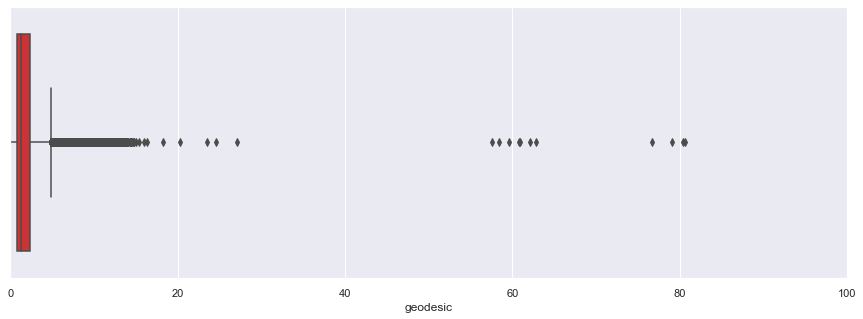

In [66]:
plt.figure(figsize=(15,5))
plt.xlim(0,100)
sns.boxplot(x=train['geodesic'],data=train)
plt.show()

In [70]:
# It can be seen that there are certain outliers in geodesic column which can be treated by outlier treatment function
outlier_treatment('geodesic')

nan nan
nan nan


In [71]:
# Let's check is there any missing values present in train column
train.isnull().sum()

fare_amount             0
pickup_datetime         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
passenger_count         0
great_circle            0
geodesic             1381
dtype: int64

In [74]:
# Imputing missing values with the help of median imputation method
train['geodesic']=train['geodesic'].fillna(train['geodesic'].median())

In [75]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
great_circle         0
geodesic             0
dtype: int64

In [76]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
great_circle         0
geodesic             0
dtype: int64

### Feature Selection

##### 1. Correlation Analysis

Statistically correlated features move together in one direction.

And linear models assume variables that do not have any correlation between them.

If features are correlated that could introduce bias into our models.

Needs to analyse correlation between numerical Variabes

In [116]:
train.head()

,fare_amount,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,TimeInterval_EarlyMorning,TimeInterval_Evening,TimeInterval_LateNight,TimeInterval_Morning,...,Seasons_Summer,Seasons_Winter,WeekendWeekday_Weekend,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,geodesic
0,4.5,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0.639764
1,16.9,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1.199926
2,5.7,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0.863167
3,7.7,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1.737223
4,5.3,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1.241710


In [117]:
test.head()

,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,TimeInterval_EarlyMorning,TimeInterval_Evening,TimeInterval_LateNight,TimeInterval_Morning,Seasons_Spring,Seasons_Summer,Seasons_Winter,WeekendWeekday_Weekend,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,geodesic
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.442197
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.506080
2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0.384120
3,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1.217683
4,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,3.344737


In [118]:
cat_var=['passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'TimeInterval_EarlyMorning', 'TimeInterval_Evening',
       'TimeInterval_LateNight', 'TimeInterval_Morning', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'WeekendWeekday_Weekend',
       'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014',
       'year_2015']
num_var=['fare_amount','geodesic']
train[cat_var]=train[cat_var].apply(lambda x:x.astype('category'))
test[cat_var]=test[cat_var].apply(lambda x:x.astype('category'))

In [119]:
# Plotting Correlation Matrix in order to Analyze Correlation betweeen fare_amount and geodesic.(Using .corr() method)
Correlation_Matrix = train[num_var].corr()

In [120]:
Correlation_Matrix

,fare_amount,geodesic
fare_amount,1.000000,0.700095
geodesic,0.700095,1.000000


As we can see from above correlation matrix fare_amount and geodesic are highly positively correlated to each other.

##### 2. Chi-square test of Independence for Categorical Variables/Features

Hypothesis testing :
    
Null Hypothesis: Both variables are independent.
Alternate Hypothesis: Both variables are not independent.
    
If p-value< 0.05 then we are fail to accept the null hypothesis saying that Both variables are dependent.
And if p-value> 0.05 then we accept the null hypothesis saying that Both variables are independent.

There should be no dependencies between Independent variables.

In [121]:
#loop for chi square values
for i in cat_var:
    for j in cat_var:
        if(i != j):
            chi2, p, dof, ex = chi2_contingency(pd.crosstab(train[i], train[j]))
            if(p < 0.05):
                print(i,"and",j,"are dependent on each other with",p,'----Remove')
            else:
                print(i,"and",j,"are independent on each other with",p,'----Keep')

passenger_count_2 and passenger_count_3 are dependent on each other with 1.7276278057866515e-27 ----Remove
passenger_count_2 and passenger_count_4 are dependent on each other with 9.07276794603704e-14 ----Remove
passenger_count_2 and passenger_count_5 are dependent on each other with 1.071217323949553e-42 ----Remove
passenger_count_2 and passenger_count_6 are dependent on each other with 1.0150722928955688e-12 ----Remove
passenger_count_2 and TimeInterval_EarlyMorning are dependent on each other with 0.028158765909041282 ----Remove
passenger_count_2 and TimeInterval_Evening are dependent on each other with 0.012219848769842551 ----Remove
passenger_count_2 and TimeInterval_LateNight are dependent on each other with 1.799127465806801e-05 ----Remove
passenger_count_2 and TimeInterval_Morning are dependent on each other with 1.0029188438007623e-16 ----Remove
passenger_count_2 and Seasons_Spring are independent on each other with 0.9609772134719967 ----Keep
passenger_count_2 and Seasons_Sum

passenger_count_6 and Seasons_Spring are independent on each other with 0.8376396806695764 ----Keep
passenger_count_6 and Seasons_Summer are independent on each other with 0.9000667918476443 ----Keep
passenger_count_6 and Seasons_Winter are independent on each other with 0.4100166509005114 ----Keep
passenger_count_6 and WeekendWeekday_Weekend are independent on each other with 0.8611342252207013 ----Keep
passenger_count_6 and year_2010 are dependent on each other with 1.869169130157414e-09 ----Remove
passenger_count_6 and year_2011 are dependent on each other with 9.76938706862353e-06 ----Remove
passenger_count_6 and year_2012 are dependent on each other with 0.028117870768973024 ----Remove
passenger_count_6 and year_2013 are dependent on each other with 1.179123049353775e-09 ----Remove
passenger_count_6 and year_2014 are dependent on each other with 3.167401219853598e-07 ----Remove
passenger_count_6 and year_2015 are dependent on each other with 2.8487632799309816e-06 ----Remove
TimeI

TimeInterval_Morning and year_2013 are independent on each other with 0.9959440564984748 ----Keep
TimeInterval_Morning and year_2014 are independent on each other with 0.7053707224124766 ----Keep
TimeInterval_Morning and year_2015 are independent on each other with 0.8144718823809278 ----Keep
Seasons_Spring and passenger_count_2 are independent on each other with 0.9609772134719967 ----Keep
Seasons_Spring and passenger_count_3 are independent on each other with 0.30466555188667266 ----Keep
Seasons_Spring and passenger_count_4 are independent on each other with 0.21847067674448095 ----Keep
Seasons_Spring and passenger_count_5 are dependent on each other with 0.024814676673233328 ----Remove
Seasons_Spring and passenger_count_6 are independent on each other with 0.8376396806695764 ----Keep
Seasons_Spring and TimeInterval_EarlyMorning are independent on each other with 0.5842366588673538 ----Keep
Seasons_Spring and TimeInterval_Evening are independent on each other with 0.5478898083767014 

year_2010 and Seasons_Spring are independent on each other with 0.16585936061173373 ----Keep
year_2010 and Seasons_Summer are independent on each other with 0.4443540139517418 ----Keep
year_2010 and Seasons_Winter are independent on each other with 0.5013876616682678 ----Keep
year_2010 and WeekendWeekday_Weekend are independent on each other with 0.20148753262117844 ----Keep
year_2010 and year_2011 are dependent on each other with 9.242277427851834e-121 ----Remove
year_2010 and year_2012 are dependent on each other with 3.1270096189596977e-125 ----Remove
year_2010 and year_2013 are dependent on each other with 1.3210215088657952e-121 ----Remove
year_2010 and year_2014 are dependent on each other with 2.845297351321779e-110 ----Remove
year_2010 and year_2015 are dependent on each other with 1.7571433427394962e-51 ----Remove
year_2011 and passenger_count_2 are dependent on each other with 0.013013989291991782 ----Remove
year_2011 and passenger_count_3 are independent on each other with 0

year_2015 and TimeInterval_LateNight are independent on each other with 0.9780724705588267 ----Keep
year_2015 and TimeInterval_Morning are independent on each other with 0.8144718823809278 ----Keep
year_2015 and Seasons_Spring are dependent on each other with 6.26942851088932e-71 ----Remove
year_2015 and Seasons_Summer are dependent on each other with 1.363353100495425e-08 ----Remove
year_2015 and Seasons_Winter are dependent on each other with 2.4884170509139046e-09 ----Remove
year_2015 and WeekendWeekday_Weekend are dependent on each other with 0.0032642141636239955 ----Remove
year_2015 and year_2010 are dependent on each other with 1.7571433427394962e-51 ----Remove
year_2015 and year_2011 are dependent on each other with 1.199964555542386e-51 ----Remove
year_2015 and year_2012 are dependent on each other with 1.5777990773474863e-53 ----Remove
year_2015 and year_2013 are dependent on each other with 5.2924841122588294e-52 ----Remove
year_2015 and year_2014 are dependent on each other

##### 3.Analysis of Variance(Anova) Test

=> It is carried out to compare between each groups in a categorical variable.

=> ANOVA only lets us know the means for different groups are same or not. It doesn’t help us identify which mean is different.

=> Hypothesis testing :

    Null Hypothesis: mean of all categories in a variable are same.
    Alternate Hypothesis: mean of at least one category in a variable is different.
=>If p-value< 0.05 then we fail to accept the null hypothesis.

=>And if p-value> 0.05 then we accept the null hypothesis.

In [122]:
model = ols('fare_amount ~ C(passenger_count_2)+C(passenger_count_3)+C(passenger_count_4)+C(passenger_count_5)+C(passenger_count_6)+C(TimeInterval_EarlyMorning)+C(TimeInterval_Evening)+C(TimeInterval_LateNight)+C(TimeInterval_Morning)+C(Seasons_Spring)+C(Seasons_Summer)+C(Seasons_Winter)+C(WeekendWeekday_Weekend)+C(year_2010)+C(year_2011)+C(year_2012)+C(year_2013)+C(year_2014)+C(year_2015)',data=train).fit()
                
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(passenger_count_2),1.0,8.346344,8.346344,0.547145,4.594976e-01
C(passenger_count_3),1.0,10.606757,10.606757,0.695326,4.043711e-01
C(passenger_count_4),1.0,83.366252,83.366252,5.465075,1.941245e-02
C(passenger_count_5),1.0,32.290446,32.290446,2.116800,1.457102e-01
C(passenger_count_6),1.0,195.173348,195.173348,12.794589,3.486463e-04
C(TimeInterval_EarlyMorning),1.0,977.727525,977.727525,64.094929,1.266323e-15
C(TimeInterval_Evening),1.0,24.815971,24.815971,1.626811,2.021632e-01
C(TimeInterval_LateNight),1.0,255.360275,255.360275,16.740143,4.307380e-05
C(TimeInterval_Morning),1.0,78.788397,78.788397,5.164973,2.305998e-02
C(Seasons_Spring),1.0,66.230823,66.230823,4.341762,3.720421e-02


As we can observe that p-value for all the variables < 0.05. We are failed to accept the null hypothesis and we accept the Alternate Hypothesis by saying that mean of all categories in variable are not same.

##### Multicollinearity Test

    =>VIF is always greater or equal to 1.
    =>if VIF is 1 --- Not correlated to any of the variables.
    =>if VIF is between 1-5 --- Moderately correlated.
    =>if VIF is above 5 --- Highly correlated.
    =>If there are multiple variables with VIF greater than 5, only remove the variable with the highest VIF.


In [123]:
outcome, predictors = dmatrices('fare_amount ~ geodesic+passenger_count_2+passenger_count_3+passenger_count_4+passenger_count_5+passenger_count_6+Seasons_Spring+Seasons_Summer+Seasons_Winter+WeekendWeekday_Weekend+TimeInterval_Evening+TimeInterval_Morning+TimeInterval_EarlyMorning+TimeInterval_LateNight+year_2010+year_2011+year_2012+year_2013+year_2014+year_2015',train, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns
vif

,VIF,features
0,15.279042,Intercept
1,1.040013,passenger_count_2[T.1]
2,1.019106,passenger_count_3[T.1]
3,1.011659,passenger_count_4[T.1]
4,1.024421,passenger_count_5[T.1]
5,1.017196,passenger_count_6[T.1]
6,1.643048,Seasons_Spring[T.1]
7,1.553378,Seasons_Summer[T.1]
8,1.588540,Seasons_Winter[T.1]
9,1.050953,WeekendWeekday_Weekend[T.1]


As VIF of all the variables are between 1 to 1.5 so we can say that there is no or very low multicollinearity

#### Feature Scaling

As this is Regression problem so we will be going to use Regression based Algorithms for that Let's standardize the data

In [124]:
# Seperating dependent and independent variables from training dataset
X=train.drop('fare_amount',axis=1).values # Independent Variable
Y=train['fare_amount'].values # Dependent Variable

In [125]:
#Splitting 80% of Training set and 20% of test set(for testing the accuracy of model),from train dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [126]:
print(train.shape,X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(16066, 21) (12852, 20) (3214, 20) (12852,) (3214,)


In [127]:
# Let's Standartize the variables.
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Model Development

#### 1. Multiple Regression

In [128]:
# Set up the parameters
params={'copy_X':[True,False],'fit_intercept':[True,False]}

#Formulating reg object of LinearRegression() class
reg=LinearRegression()

#Declaring rer_cv with GridSearchCV for Hyperparameter Tuning.
reg_cv= GridSearchCV(reg,params,cv=5,scoring='r2')

# Fit to dataset(Dependent and Independent Variable)
reg_cv.fit(X,Y)

# Printing the tuned parameters and score
print("Tuned Decision reg Parameters: {}".format(reg_cv.best_params_))
print("Best score is {}".format(reg_cv.best_score_))

Tuned Decision reg Parameters: {'copy_X': True, 'fit_intercept': True}
Best score is 0.5070409739150635


In [129]:
#Function  for Root mean square logarithmic error
def rmsle(y,y_hat):
    calc = metrics.mean_squared_log_error(y,y_hat)
    return np.sqrt(calc)

#Function for R^2, Adj R^2, MAPE, MSE, RMSE
def scores(y, y_hat):
    print('r square :{}', metrics.r2_score(y, y_hat))
    print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y, y_hat))*(len(y)-1)/(len(y)-X_train.shape[1]-1)))
    print('MAPE:{}'.format(np.mean(np.abs((y - y_hat) / y))*100))
    print('MSE:', metrics.mean_squared_error(y, y_hat))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_hat))) 
    
#Function to predict Error rate of model by providing test data as input
def test_scores(model):
    print('<<<------------------- Training Data Score --------------------->')
    print()
    #Predicting result on Training data
    Y_pred = model.predict(X_train)
    scores(Y_train,Y_pred)
    print('RMSLE:',rmsle(Y_train,Y_pred))
    print()
    print('<<<------------------- Test Data Score --------------------->')
    print()
    # Evaluating on Test Set
    Y_pred = model.predict(X_test)
    scores(Y_test,Y_pred)
    print('RMSLE:',rmsle(Y_test,Y_pred))

R^2: 0.46223579038628354
Root Mean Squared Error: 2.8842542763602617
<<<------------------- Training Data Score --------------------->

r square :{} 0.5197146849974894
Adjusted r square:0.5189660522876421
MAPE:22.233058991740187
MSE: 7.536048003500907
RMSE: 2.7451863331112714
RMSLE: 0.25569178176478835

<<<------------------- Test Data Score --------------------->

r square :{} 0.4622357903862835
Adjusted r square:0.4588673957128496
MAPE:22.806807724377723
MSE: 8.318922730702456
RMSE: 2.8842542763602617
RMSLE: 0.26739630532904346
[ 1.73838795e-02  1.80280975e-02  2.94409535e-02  2.26119146e-02
  4.20912742e-02 -4.80060395e-02 -7.38288876e-02 -1.38332005e-01
 -1.46425420e-01 -1.27303696e-01 -1.63133692e-01 -1.49684646e-01
 -8.18465541e-02 -3.82046325e-02  2.60267542e-03  1.03321218e-01
  3.65912505e-01  3.79877800e-01  3.55687588e-01  2.79571174e+00]


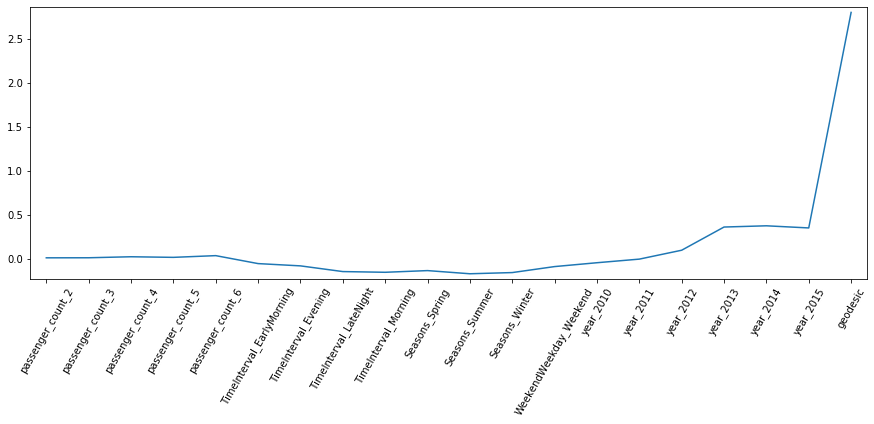

In [131]:
# Create the regressor: reg_all
reg_all = LinearRegression(copy_X= True, fit_intercept=True)

# Fit the regressor to the training data
reg_all.fit(X_train,Y_train)

# Predict on the test data: y_pred
Y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, Y_test)))
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("Root Mean Squared Error: {}".format(rmse))
test_scores(reg_all)

# Compute and print the coefficients
reg_coef = reg_all.coef_
print(reg_coef)

# Plot the coefficients
plt.figure(figsize=(15,5))
plt.plot(range(len(test.columns)), reg_coef)
plt.xticks(range(len(test.columns)), test.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [133]:
# Applying Cross validation 

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,Y,cv=5,scoring='neg_mean_squared_error')

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[-7.40342794 -7.47453096 -7.33752025 -8.1306949  -8.18576482]
Average 5-Fold CV Score: -7.706387774138254


##### 2.Ridge Regression

In [139]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'alpha':np.logspace(-4,0,50),'normalize':[True,False],'max_iter':range(500,5000,500)}

# Assign a ridge classifier: ridge
ridge = Ridge()

# Assign the gridSearchCV object: ridge_reg
ridge_reg= GridSearchCV(ridge, param_dist, cv=5,scoring='r2')

# Fit it to the data
ridge_reg.fit(X, Y)

# Print the tuned parameters and score
print("Tuned Decision ridge Parameters: {}".format(ridge_reg.best_params_))
print("Best score is {}".format(ridge_reg.best_score_))

Tuned Decision ridge Parameters: {'alpha': 1.0, 'max_iter': 500, 'normalize': False}
Best score is 0.5070426407281174


[ 1.73826188e-02  1.80267990e-02  2.94407235e-02  2.26035383e-02
  4.20957847e-02 -4.79641807e-02 -7.37927413e-02 -1.38284148e-01
 -1.46388271e-01 -1.27256597e-01 -1.63092730e-01 -1.49643681e-01
 -8.18333918e-02 -3.82726925e-02  2.53293362e-03  1.03243115e-01
  3.65821297e-01  3.79788693e-01  3.55602957e-01  2.79549114e+00]


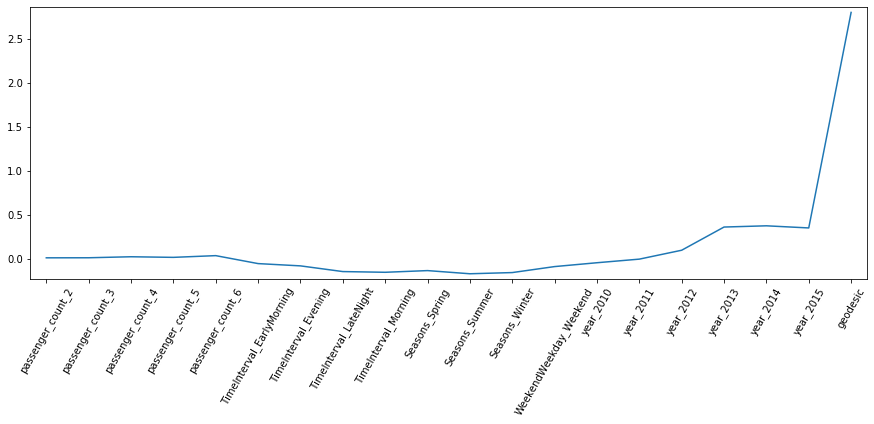

<<<------------------- Training Data Score --------------------->

r square :{} 0.5197146812471293
Adjusted r square:0.5189660485314362
MAPE:22.23379965610682
MSE: 7.536048062346957
RMSE: 2.7451863438293143
RMSLE: 0.2556931429860997

<<<------------------- Test Data Score --------------------->

r square :{} 0.4622416922671747
Adjusted r square:0.45887333456136314
MAPE:22.80752256792504
MSE: 8.318831431783297
RMSE: 2.8842384491895423
RMSLE: 0.2673965786798506


In [142]:
# Initialize a ridge regressor with best tuned params: ridge
ridge = Ridge(alpha=1.0, normalize=False, max_iter = 500)

# Fit the regressor to the data
ridge.fit(X_train,Y_train)

# Compute and print the coefficients
ridge_coef = ridge.coef_
print(ridge_coef)

# Plot the coefficients
plt.figure(figsize=(15,5))
plt.plot(range(len(test.columns)), ridge_coef)
plt.xticks(range(len(test.columns)), test.columns.values, rotation=60)
plt.margins(0.02)
plt.show()
test_scores(ridge)

##### 3. Lasso Regression

In [143]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'alpha':np.logspace(-4, 0, 50),
          'normalize':[True,False],
             'max_iter':range(500,5000,500)}
# Initialize a lasso classifier: lasso
lasso = Lasso()

# Initialize the gridSearchCV object: lasso_reg
lasso_reg = GridSearchCV(lasso, param_dist, cv=5,scoring='r2')

# Fit it to the data
lasso_reg.fit(X, Y)

# Print the tuned parameters and score
print("Tuned Decision lasso Parameters: {}".format(lasso_reg.best_params_))
print("Best score is {}".format(lasso_reg.best_score_))

Tuned Decision lasso Parameters: {'alpha': 0.0004498432668969444, 'max_iter': 500, 'normalize': False}
Best score is 0.5070593646184973


[ 1.67286575e-02  1.74237077e-02  2.88958034e-02  2.19358506e-02
  4.17059282e-02 -4.66220441e-02 -7.21814596e-02 -1.36740492e-01
 -1.44809191e-01 -1.25698435e-01 -1.61632849e-01 -1.48110294e-01
 -8.12548795e-02 -3.93402843e-02  7.47258893e-04  1.01396754e-01
  3.64057884e-01  3.78057086e-01  3.53935434e-01  2.79517614e+00]


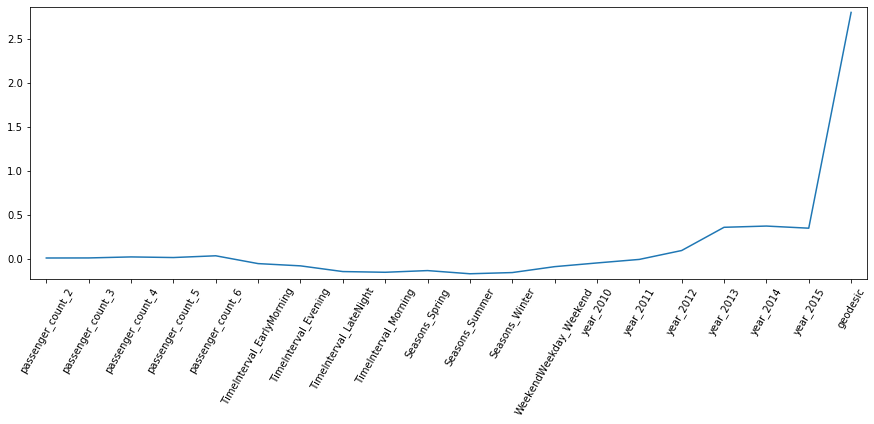

<<<------------------- Training Data Score --------------------->

r square :{} 0.5197140231631076
Adjusted r square:0.5189653894216426
MAPE:22.234800115752122
MSE: 7.536058388194163
RMSE: 2.745188224547483
RMSLE: 0.2556897583393822

<<<------------------- Test Data Score --------------------->

r square :{} 0.46227737990568774
Adjusted r square:0.4589092457366034
MAPE:22.80896430394694
MSE: 8.31827936323369
RMSE: 2.88414274321395
RMSLE: 0.26738176347202347


In [144]:
# Initialize a lasso regressor with best tuned params: lasso
lasso = Lasso(alpha=0.0004498432668969444, normalize=False, max_iter = 500)

# Fit the regressor to the data
lasso.fit(X_train,Y_train)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.figure(figsize=(15,5))
plt.plot(range(len(test.columns)), lasso_coef)
plt.xticks(range(len(test.columns)), test.columns.values, rotation=60)
plt.margins(0.02)
# plt.savefig('ridge coefficients')
plt.show()
test_scores(lasso)

##### 4. Decision Tree Regression

In [148]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'max_depth': range(2,16,2),
              'min_samples_split': range(2,16,2)}

# Initialize a Decision Tree classifier: D_tree
D_tree = DecisionTreeRegressor()

# Instantiate the gridSearchCV object: tree_cv
tree_reg = GridSearchCV(D_tree, param_dist, cv=5)

# Fit it to the data
tree_reg.fit(X, Y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_reg.best_params_))
print("Best score is {}".format(tree_reg.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 6, 'min_samples_split': 12}
Best score is 0.5585217838169321


[0.00000000e+00 0.00000000e+00 6.14277970e-04 2.52590595e-04
 5.99015884e-04 3.86093883e-03 9.29305538e-04 2.89151356e-04
 2.50813862e-04 6.08323436e-04 0.00000000e+00 3.21512870e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.29713213e-02 1.54532749e-02 1.27337620e-02 9.51115711e-01]


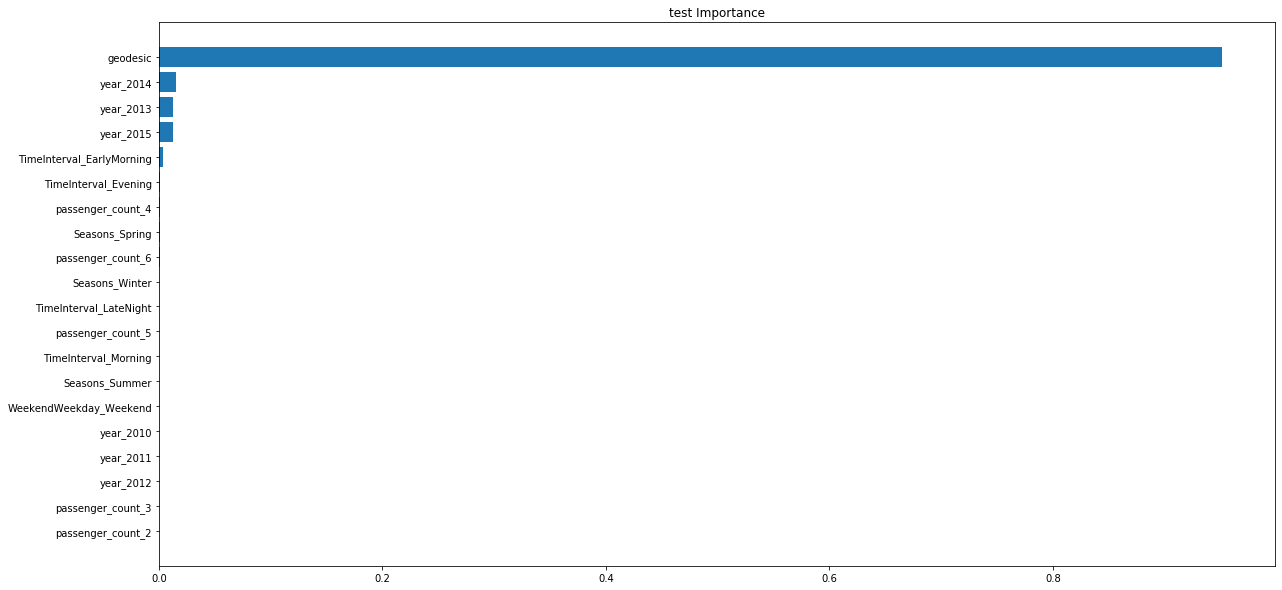

<<<------------------- Training Data Score --------------------->

r square :{} 0.5856433612259532
Adjusted r square:0.5849974931895194
MAPE:20.834477529447312
MSE: 6.501576089941827
RMSE: 2.5498188347296025
RMSLE: 0.23277827800294

<<<------------------- Test Data Score --------------------->

r square :{} 0.5287820660109791
Adjusted r square:0.5258304973671393
MAPE:21.848151073799688
MSE: 7.28948768269968
RMSE: 2.699905124758957
RMSLE: 0.24668134270818431


In [150]:
# Initialize a tree regressor: tree
D_tree = DecisionTreeRegressor(max_depth= 6, min_samples_split=12)

# Fit the regressor to the data
D_tree.fit(X_train,Y_train)

# Compute and print the coefficients
D_tree_features = D_tree.feature_importances_
print(D_tree_features)

# Sort test importances in descending order
indices = np.argsort(D_tree_features)[::1]

# Rearrange test names so they match the sorted test importances
names = [test.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(20,10))
plt.title("test Importance")

# Add horizontal bars
plt.barh(range(pd.DataFrame(X_train).shape[1]),D_tree_features[indices],align = 'center')
plt.yticks(range(pd.DataFrame(X_train).shape[1]), names)
plt.show()

# Make predictions and cal error
test_scores(D_tree)

##### 5. Random Forest Regressor

In [155]:
# Create the random grid
random_grid = {'n_estimators': range(100,500,100),'max_depth': range(5,20,1),'min_samples_leaf':range(2,5,1),'max_features':['auto','sqrt','log2'],'bootstrap': [True, False],'min_samples_split': range(2,5,1)}

# Initialize a Decision Forest classifier: Forest
Forest = RandomForestRegressor()

# Instantiate the gridSearchCV object: Forest_cv
Forest_reg = RandomizedSearchCV(Forest, random_grid, cv=5)

# Fit it to the data
Forest_reg.fit(X,Y)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(Forest_reg.best_params_))
print("Best score is {}".format(Forest_reg.best_score_))

Tuned Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 16, 'bootstrap': True}
Best score is 0.557878668176511


[0.00650205 0.00355618 0.00276709 0.00436663 0.00228353 0.00725465
 0.00716437 0.00707765 0.00648958 0.00834616 0.00750227 0.00758881
 0.0106612  0.00676466 0.00501395 0.00469631 0.01028809 0.01223553
 0.00852622 0.87091506]


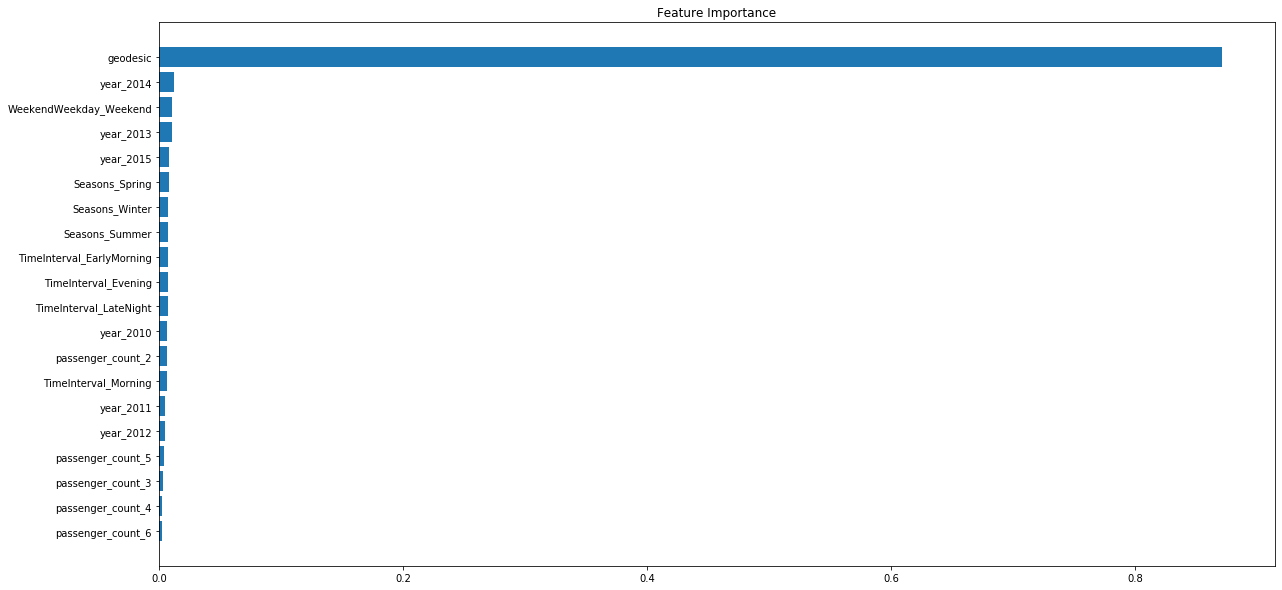

<<<------------------- Training Data Score --------------------->

r square :{} 0.6596721696928558
Adjusted r square:0.6591416922081591
MAPE:19.431207246723627
MSE: 5.340006837620139
RMSE: 2.3108454811216044
RMSLE: 0.21322938272667089

<<<------------------- Test Data Score --------------------->

r square :{} 0.5307619205008856
Adjusted r square:0.5278227530752726
MAPE:22.640701938873963
MSE: 7.258860399914541
RMSE: 2.6942272361318267
RMSLE: 0.24964786477329926


In [156]:
# Initialize a Forest regressor: Forest
Forest = RandomForestRegressor(n_estimators=200, min_samples_split= 2, min_samples_leaf=3, max_features='log2', max_depth=16, bootstrap=True)

# Fit the regressor to the data
Forest.fit(X_train,Y_train)

# Compute and print the coefficients
Forest_features = Forest.feature_importances_
print(Forest_features)

# Sort feature importances in descending order
indices = np.argsort(Forest_features)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [test.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(20,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(pd.DataFrame(X_train).shape[1]),Forest_features[indices],align = 'center')
plt.yticks(range(pd.DataFrame(X_train).shape[1]), names)
plt.savefig('Random forest feature importance')
plt.show()
test_scores(Forest)


In [157]:
# Create a random forest regression object: Forest
Forest = RandomForestRegressor(n_estimators=400, min_samples_split= 2, min_samples_leaf=4, max_features='auto', max_depth=12, bootstrap=True)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(Forest,X,Y,cv=5,scoring='neg_mean_squared_error')

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[-6.67732762 -6.46167564 -6.55038413 -6.9730539  -6.972281  ]
Average 5-Fold CV Score: -6.7269444575011


##### 6. Boosting Method: XGBoost to improve accuracy

In [161]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test)

In [162]:
dtrain,dtest,data_dmatrix

(<xgboost.core.DMatrix at 0x1fa6b211188>,
 <xgboost.core.DMatrix at 0x1fa6ab3eb48>)

In [163]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,num_boost_round=50,early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

[17:57:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,8.376319,0.017950,8.377211,0.075751
1,7.662802,0.028099,7.664917,0.112267
2,7.061115,0.052137,7.063428,0.129072
3,6.509344,0.056577,6.511895,0.133271
4,6.057272,0.062751,6.059791,0.138374


In [164]:
# final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

49    2.703599
Name: test-rmse-mean, dtype: float64


In [165]:
Xgb = XGBRegressor()
Xgb.fit(X_train,Y_train)
test_scores(Xgb)

[17:59:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
<<<------------------- Training Data Score --------------------->

r square :{} 0.5964564722821161
Adjusted r square:0.5958274589118131
MAPE:20.2756004334339
MSE: 6.33191001554602
RMSE: 2.516328677964391
RMSLE: 0.22845139677243748

<<<------------------- Test Data Score --------------------->

r square :{} 0.5384893307345364
Adjusted r square:0.5355985655026827
MAPE:21.227599718606278
MSE: 7.139321524896516
RMSE: 2.671950883698373
RMSLE: 0.24328134544428948


In [166]:
# Create the random grid
para = {'n_estimators': range(100,500,100),'max_depth': range(3,10,1),'reg_alpha':np.logspace(-4, 0, 50),'subsample': np.arange(0.1,1,0.2),'colsample_bytree': np.arange(0.1,1,0.2),'colsample_bylevel': np.arange(0.1,1,0.2),'colsample_bynode': np.arange(0.1,1,0.2),'learning_rate': np.arange(.05, 1, .05)}

# Initialize a Xgboost classifier: Xgb
Xgb = XGBRegressor()

# Initialize the RandomSearchCV object: Xgb_cv
xgb_cv = RandomizedSearchCV(Xgb, para, cv=5)

# Fit it to the data
xgb_cv.fit(X, Y)
  
# Print the tuned parameters and score
print("Tuned Xgboost Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))

[18:02:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:56] WARNI

[18:06:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Tuned Xgboost Parameters: {'subsample': 0.7000000000000001, 'reg_alpha': 0.0005428675439323859, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.1, 'colsample_bynode': 0.9000000000000001, 'colsample_bylevel': 0.9000000000000001}
Best score is 0.5591264635574758


[18:15:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.00593016 0.00547296 0.01191489 0.00407901 0.01238559 0.03521245
 0.00588531 0.02130579 0.0186008  0.00722397 0.01041762 0.00919815
 0.00798316 0.05105332 0.03521894 0.00862056 0.05665969 0.07658456
 0.07151289 0.5447401 ]


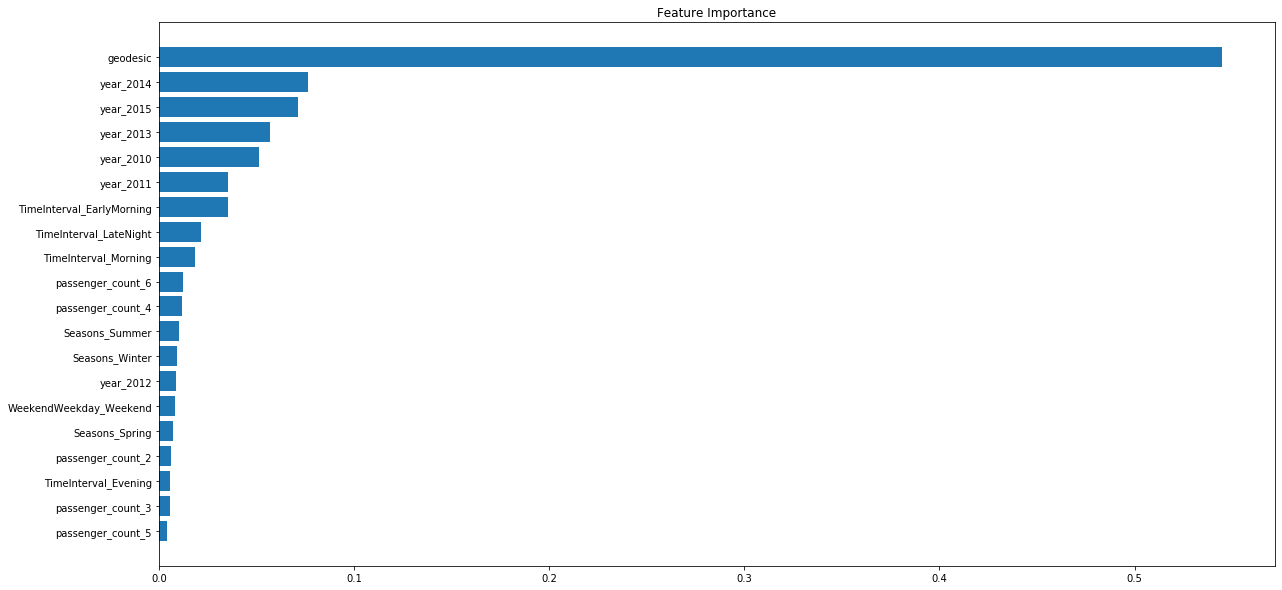

<<<------------------- Training Data Score --------------------->

r square :{} 0.5881613416016214
Adjusted r square:0.5875193984040554
MAPE:20.829941017122948
MSE: 6.46206703065941
RMSE: 2.5420596040729277
RMSLE: 0.23079178068732548

<<<------------------- Test Data Score --------------------->

r square :{} 0.5294992395697691
Adjusted r square:0.5265521630872747
MAPE:22.031167472955893
MSE: 7.278393393951156
RMSE: 2.697849772309636
RMSLE: 0.24707268264067805


In [172]:
# Initialize a xgb regressor: xgb
Xgb = XGBRegressor(subsample= 0.7000000000000001, reg_alpha= 0.0005428675439323859, n_estimators= 400, max_depth= 7, learning_rate= 0.1, colsample_bytree= 0.1, colsample_bynode= 0.9000000000000001, colsample_bylevel= 0.9000000000000001)

# Fit the regressor to the data
Xgb.fit(X_train,Y_train)

# Compute and print the coefficients
xgb_features = Xgb.feature_importances_
print(xgb_features)

# Sort feature importances in descending order
indices = np.argsort(xgb_features)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [test.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(20,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(pd.DataFrame(X_train).shape[1]),xgb_features[indices],align = 'center')
plt.yticks(range(pd.DataFrame(X_train).shape[1]), names)
plt.show()# Make predictions
test_scores(Xgb)

### Finalized Model

Creating Standalone Model for entire dataset

In [173]:
test.columns

Index(['passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6', 'TimeInterval_EarlyMorning',
       'TimeInterval_Evening', 'TimeInterval_LateNight',
       'TimeInterval_Morning', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'WeekendWeekday_Weekend', 'year_2010', 'year_2011',
       'year_2012', 'year_2013', 'year_2014', 'year_2015', 'geodesic'],
      dtype='object')

In [174]:
train.columns

Index(['fare_amount', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'TimeInterval_EarlyMorning', 'TimeInterval_Evening',
       'TimeInterval_LateNight', 'TimeInterval_Morning', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'WeekendWeekday_Weekend',
       'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014',
       'year_2015', 'geodesic'],
      dtype='object')

In [175]:
test.shape,train.shape

((9914, 20), (16066, 21))

In [176]:
test_predicted=pd.read_csv('test.csv')

In [177]:
test_predicted.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [178]:
test_pickup_datetime=test_predicted['pickup_datetime']

In [184]:
#Function for R^2, Adj R^2, MAPE, MSE, RMSE
def score(y, y_hat):
    print('r square :{}', metrics.r2_score(y, y_hat))
    print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y, y_hat))*(len(y)-1)/(len(y)-X_train.shape[1]-1)))
    print('MAPE:{}'.format(np.mean(np.abs((y - y_hat) / y))*100))
    print('MSE:', metrics.mean_squared_error(y, y_hat))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_hat)))


# Function to define Scores
def scores(model):
    print('<<<------------------- Training Data Score --------------------->')
    print()
    #Predicting result on Training data
    Y_pred = model.predict(X)
    score(Y,Y_pred)
    print('RMSLE:',rmsle(Y,Y_pred))

[18:44:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.00155935 0.00185349 0.00250581 0.00251283 0.00473179 0.02087765
 0.00135975 0.00503138 0.01620605 0.00278392 0.0041573  0.0050326
 0.00436757 0.02208201 0.00714614 0.00363936 0.02874118 0.03757793
 0.02296776 0.80486614]


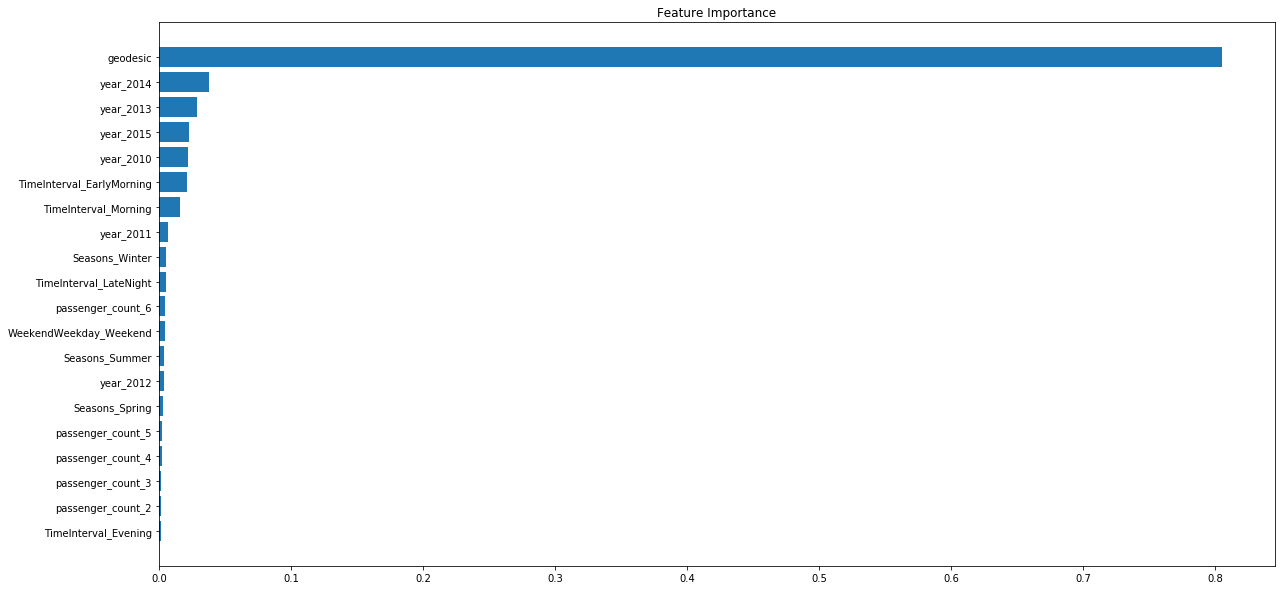

<<<------------------- Training Data Score --------------------->

r square :{} 0.5544717216937789
Adjusted r square:0.5539163732633567
MAPE:22.338955482263938
MSE: 6.971021003568455
RMSE: 2.6402691157471914
RMSLE: 0.24305065499034056


In [185]:
# Instantiate a xgb regressor: xgb
Xgb = XGBRegressor(subsample= 0.7000000000000001, reg_alpha= 0.0005428675439323859, n_estimators= 400, max_depth= 7, learning_rate= 0.1, colsample_bytree= 0.1, colsample_bynode= 0.9000000000000001, colsample_bylevel= 0.9000000000000001)

# Fit the regressor to the data
Xgb.fit(X,Y)

# Compute and print the coefficients
xgb_features = Xgb.feature_importances_
print(xgb_features)

# Sort feature importances in descending order
indices = np.argsort(xgb_features)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [test.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(20,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(pd.DataFrame(X_train).shape[1]),xgb_features[indices],align = 'center')
plt.yticks(range(pd.DataFrame(X_train).shape[1]), names)
plt.show()
scores(Xgb)

# Predictions
pred = Xgb.predict(test.values)
pred_results_wrt_date = pd.DataFrame({"pickup_datetime":test_pickup_datetime,"fare_amount" : pred})
pred_results_wrt_date.to_csv("predictions_xgboost.csv",index=False)

In [186]:
pred_results_wrt_date

,pickup_datetime,fare_amount
0,2015-01-27 13:08:24 UTC,9.635707
1,2015-01-27 13:08:24 UTC,9.696162
2,2011-10-08 11:53:44 UTC,5.315485
3,2012-12-01 21:12:12 UTC,8.445663
4,2012-12-01 21:12:12 UTC,13.188313
...,...,...
9909,2015-05-10 12:37:51 UTC,10.040934
9910,2015-01-12 17:05:51 UTC,11.626698
9911,2015-04-19 20:44:15 UTC,14.967863
9912,2015-01-31 01:05:19 UTC,14.815756
